## Imports

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from src.graphs.graph_loader import GraphDataset

## Params

In [2]:
LOAD_FOLDER = '/datasets/johan_tests_original_format_graphs/'\
    'similarity_shape_100_20__score_threshold_006__similarity_relevance_07/training/'

In [3]:
BATCH_SIZE = 64

In [4]:
VAL_PERCENTAGE = 0.15
TEST_PERCENTAGE = 0.15

In [5]:
RELEVANCE_THRESHOLD = 0.04

In [6]:
RANDOM_STATE = 42

## Constants

In [7]:
dataset = GraphDataset(
    dataset_path=LOAD_FOLDER,
    batch_size=BATCH_SIZE,
    val_percentage=VAL_PERCENTAGE,
    test_percentage=TEST_PERCENTAGE,
    random_state=RANDOM_STATE,
    score_threshold=RELEVANCE_THRESHOLD
)

In [8]:
dataset.metadata[
    dataset.metadata['origin'] != 'original'
]['score'].describe()

count    352887.000000
mean          0.027102
std           0.022890
min          -0.105383
25%           0.012621
50%           0.025352
75%           0.038900
max           0.261145
Name: score, dtype: float64

<AxesSubplot:ylabel='Frequency'>

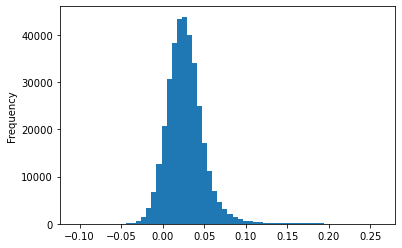

In [9]:
dataset.metadata[
    dataset.metadata['origin'] != 'original'
]['score'].plot(kind='hist', bins=60)

In [10]:
dataset.metadata[
    dataset.metadata['origin'] != 'original'
]['score'].quantile(0.8)

0.042420512744462485

In [11]:
for split,df in dataset.splits.items():
    print(split, df['label'].value_counts())

train 0.0    188536
1.0     85965
Name: label, dtype: int64
val 0.0    40750
1.0    17318
Name: label, dtype: int64
test 0.0    41397
1.0    17537
Name: label, dtype: int64


In [12]:
train_batch_generator = dataset.get_batch('train')
for i, b in enumerate(train_batch_generator):
    print(b)
    break

DataBatch(x=[6400, 20], edge_index=[2, 625648], y=[64], batch=[6400], ptr=[65])


In [13]:
val_batch_generator = dataset.get_batch('val')
for i, b in enumerate(val_batch_generator):
    print(b)
    break

DataBatch(x=[6400, 20], edge_index=[2, 627025], y=[64], batch=[6400], ptr=[65])


In [14]:
test_batch_generator = dataset.get_batch('test')
for i, b in enumerate(test_batch_generator):
    print(b)
    break

DataBatch(x=[6400, 20], edge_index=[2, 622882], y=[64], batch=[6400], ptr=[65])
